# Making 3D Marker Grid

In [1]:
%matplotlib inline

import numpy as np

from ar_tracking_tools.bundle_pdf_utils import makeBundlePdf, IN2CM
from ar_tracking_tools.bundle_xml_utils import makeBundleXml
from ar_tracking_tools.marker_utils import makeMarkerGrid, makeMultiResolutionGrid

from IPython.display import IFrame
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 20, 12
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

### Bag Marker Bundle (points in 2D and then folding)

In [2]:
from ar_tracking_tools.geometry_utils import foldPoints

corner_position = np.array([0,0,0])

rows = 2
cols = 2
base_width = 16.5
marker_size = 7

bag_width = 26.162
centering_margin = (bag_width-base_width)/2.
side_offset = centering_margin + 1.5

back_margin = centering_margin
top_shift_right = 2

base_pts = makeMarkerGrid(rows,cols, marker_size, width = base_width, height=base_width)
base_sizes = np.repeat(marker_size, len(base_pts))

top_pts = base_pts + np.array([centering_margin + top_shift_right, -back_margin, 0]) + corner_position

back_pts = base_pts + np.array([centering_margin + top_shift_right, base_width + side_offset, 0])
back_edge = ((0,0,0), (bag_width,0,0), 90*np.pi/180.)
back_pts = foldPoints(back_pts, back_edge, reverse=True) + corner_position

left_pts = base_pts + np.array([-base_width - side_offset, -back_margin, 0])
left_edge = ((0,0,0), (0,-base_width,0), -90*np.pi/180.)
left_pts = foldPoints(left_pts, left_edge, reverse=True) + corner_position

right_pts = base_pts + np.array([bag_width + side_offset, -back_margin, 0])
right_edge = ((bag_width,0,0), (bag_width,-base_width,0), 90*np.pi/180.)
right_pts = foldPoints(right_pts, right_edge, reverse=True) + corner_position

point_sets = [top_pts, back_pts, left_pts, right_pts]
marker_sizes = np.concatenate([base_sizes, base_sizes, base_sizes, base_sizes])

pdf = makeBundlePdf(point_sets, marker_size=marker_sizes, start_index = 30, text_size = .15, 
                    rosette_positions = (0,0,0))
xml_str = makeBundleXml(point_sets, marker_size=marker_sizes, start_index = 30)

pdf.output('example_bundles/4x4_bag_bundle.pdf', 'F')
with open('example_bundles/4x4_bag_bundle.xml', 'w') as f:
    f.write(xml_str)

<IPython.core.display.Javascript object>


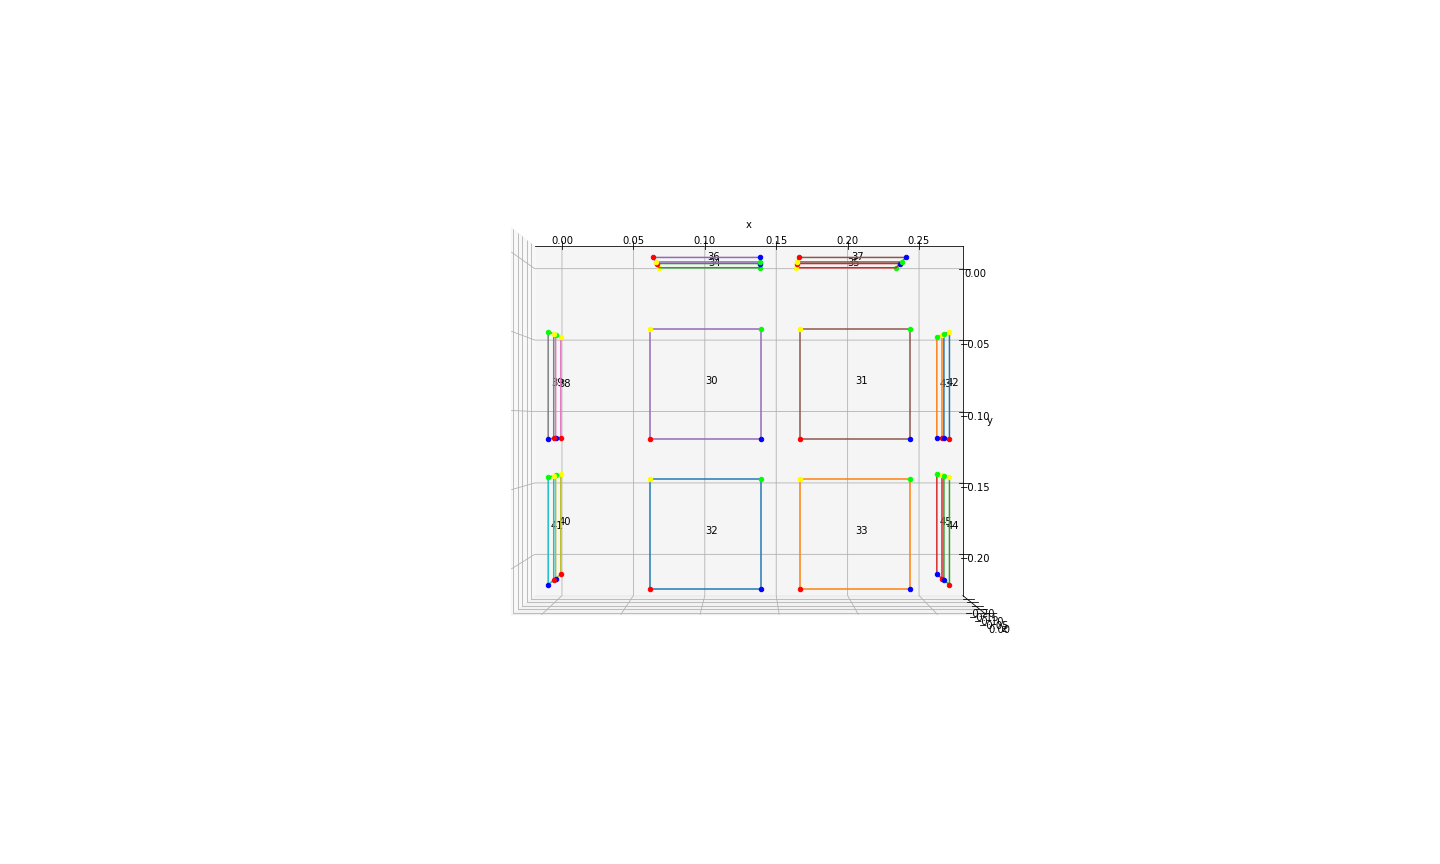

In [3]:
%matplotlib notebook
#%matplotlib inline
from ar_tracking_tools.bundle_visualization_utils import visualizeBundleXML

ax = visualizeBundleXML('example_bundles/4x4_bag_bundle.xml', show = True)